# Mutual Information Scores

### Higher the mutual information score, stronger relationship between 2 features

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the datatsets

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
m = df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.duplicated().sum()

0

### Seperate X and Y(Survived)

Remove statistically insignificant features - Passenger Id, Name, Ticket no

In [6]:
x = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
y = df[['Survived']]

In [7]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [9]:
x.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

### Seperate categorical and continuous features

In [11]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [12]:
cat

['Sex', 'Embarked']

In [13]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Perform preprocessing for feature selection

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [16]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ordinal', OrdinalEncoder())])

In [17]:
pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [18]:
x_pre1 = pre1.fit_transform(x)

In [19]:
x_pre1.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex,cat__Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,1.0,2.0


### Feature selection with Mutual information scores

In [20]:
from sklearn.feature_selection import mutual_info_classif

In [21]:
mi = mutual_info_classif(x_pre1, y)
mi

array([0.0577832 , 0.02576786, 0.03462163, 0.01052352, 0.13113064,
       0.14689977, 0.        ])

In [22]:
x_pre1.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex', 'cat__Embarked'],
      dtype='object')

In [23]:
mi = pd.Series(mi)
mi

0    0.057783
1    0.025768
2    0.034622
3    0.010524
4    0.131131
5    0.146900
6    0.000000
dtype: float64

In [24]:
mi.index = x_pre1.columns
mi

num__Pclass      0.057783
num__Age         0.025768
num__SibSp       0.034622
num__Parch       0.010524
num__Fare        0.131131
cat__Sex         0.146900
cat__Embarked    0.000000
dtype: float64

In [25]:
mi = mi.sort_values(ascending=False)
mi

cat__Sex         0.146900
num__Fare        0.131131
num__Pclass      0.057783
num__SibSp       0.034622
num__Age         0.025768
num__Parch       0.010524
cat__Embarked    0.000000
dtype: float64

<Axes: title={'center': 'Mutual Info Scores'}>

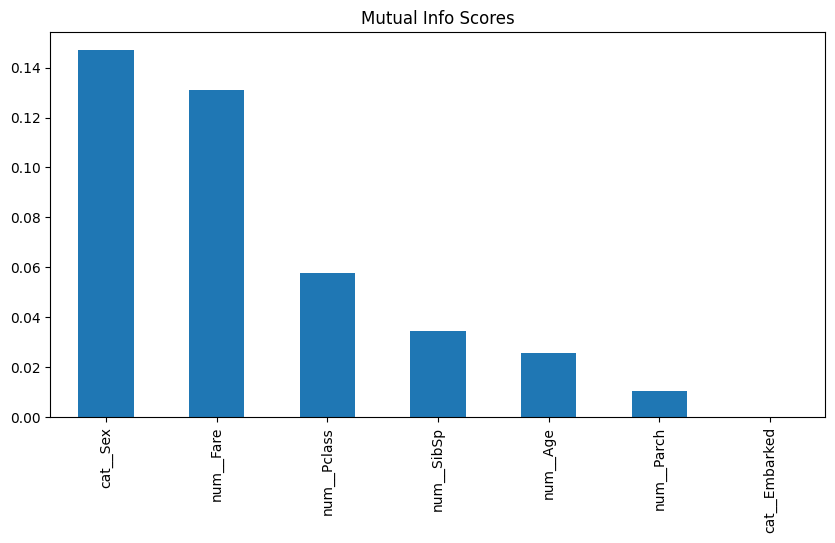

In [26]:
mi.plot(kind='bar', title='Mutual Info Scores', figsize=(10,5))

### Select top 4 features from above

In [27]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif, k=4)
sel.fit(x_pre1, y)
sel_cols =  sel.get_feature_names_out()
sel_cols

array(['num__Pclass', 'num__Age', 'num__Fare', 'cat__Sex'], dtype=object)

In [28]:
sel_cols[0]

'num__Pclass'

In [29]:
sel_cols[0].split('__')

['num', 'Pclass']

In [30]:
sel_cols[0].split('__')[1]

'Pclass'

In [31]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [32]:
imp_cols

['Pclass', 'Age', 'Fare', 'Sex']

In [33]:
x_imp = x[imp_cols]
x_imp

,Pclass,Age,Fare,Sex
0,3,22.0,7.2500,male
1,1,38.0,71.2833,female
2,3,26.0,7.9250,female
3,1,35.0,53.1000,female
4,3,35.0,8.0500,male
...,...,...,...,...
886,2,27.0,13.0000,male
887,1,19.0,30.0000,female
888,3,NaN,23.4500,female
889,1,26.0,30.0000,male


### Seperate cat con features

In [34]:
cat_sel = list(x_imp.columns[x_imp.dtypes=='object'])
con_sel = list(x_imp.columns[x_imp.dtypes!='object'])

In [35]:
cat_sel

['Sex']

In [36]:
con_sel

['Pclass', 'Age', 'Fare']

### Create a final pipeline

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [39]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [40]:
pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)]).set_output(transform='pandas')

In [41]:
x_sel_pre = pre2.fit_transform(x_imp)
x_sel_pre

,num__Pclass,num__Age,num__Fare,cat__Sex_female,cat__Sex_male
0,0.827377,-0.565736,-0.502445,0.0,1.0
1,-1.566107,0.663861,0.786845,1.0,0.0
2,0.827377,-0.258337,-0.488854,1.0,0.0
3,-1.566107,0.433312,0.420730,1.0,0.0
4,0.827377,0.433312,-0.486337,0.0,1.0
...,...,...,...,...,...
886,-0.369365,-0.181487,-0.386671,0.0,1.0
887,-1.566107,-0.796286,-0.044381,1.0,0.0
888,0.827377,-0.104637,-0.176263,1.0,0.0
889,-1.566107,-0.258337,-0.044381,0.0,1.0


### Apply Train Test Split

In [42]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_sel_pre, y, test_size=0.2, random_state=42)

In [43]:
xtrain.head()

,num__Pclass,num__Age,num__Fare,cat__Sex_female,cat__Sex_male
331,-1.566107,1.240235,-0.074583,0.0,1.0
733,-0.369365,-0.488887,-0.386671,0.0,1.0
382,0.827377,0.202762,-0.488854,0.0,1.0
704,0.827377,-0.258337,-0.490280,0.0,1.0
813,0.827377,-1.795334,-0.018709,1.0,0.0


In [44]:
xtest.head()

,num__Pclass,num__Age,num__Fare,cat__Sex_female,cat__Sex_male
709,0.827377,-0.104637,-0.341452,0.0,1.0
439,-0.369365,0.125912,-0.437007,0.0,1.0
840,0.827377,-0.719436,-0.488854,0.0,1.0
720,-0.369365,-1.795334,0.016023,1.0,0.0
39,0.827377,-1.180535,-0.422074,1.0,0.0


In [45]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [46]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [47]:
xtrain.shape

(712, 5)

In [48]:
xtest.shape

(179, 5)

### Create a base random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [50]:
model.score(xtrain, ytrain)

0.9775280898876404

In [51]:
model.score(xtest, ytest)

0.7988826815642458

### Predict the results for train and test

In [52]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [55]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [54]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [56]:
ypred_ts[0:5]


array([0, 0, 1, 1, 0], dtype=int64)

In [57]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


### Plot confusion matrix

In [58]:
model.classes_

array([0, 1], dtype=int64)

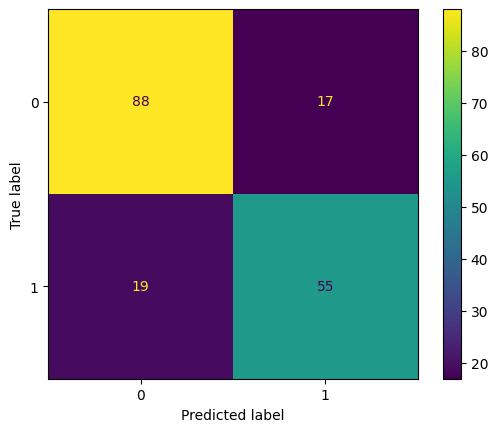

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

### Plot the classification report

In [60]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Perform out of sample predictions

In [61]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [63]:
m = xnew.isna().sum()

In [64]:
m[m>0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [65]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex'])])

### Apply pre2.transform on the xnew

In [66]:
xnew_pre = pre2.transform(xnew)
xnew_pre.head()

,num__Pclass,num__Age,num__Fare,cat__Sex_female,cat__Sex_male
0,0.827377,0.394887,-0.490783,0.0,1.0
1,0.827377,1.355510,-0.507479,1.0,0.0
2,-0.369365,2.508257,-0.453367,0.0,1.0
3,0.827377,-0.181487,-0.474005,0.0,1.0
4,0.827377,-0.565736,-0.401017,1.0,0.0


### Get the results

In [67]:
preds = model.predict(xnew_pre)
preds

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [68]:
prob = model.predict_proba(xnew_pre)[:,1]

In [69]:
prob[0:5]

array([0.12, 0.37, 0.54, 0.73, 0.45])

### Save above results in dataframe

In [70]:
df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [71]:
df_final['Survived_pred'] = preds
df_final['Prob'] = prob

In [72]:
df_final

,PassengerId,Survived_pred,Prob
0,892,0,0.120
1,893,0,0.370
2,894,1,0.540
3,895,1,0.730
4,896,0,0.450
...,...,...,...
413,1305,0,0.000
414,1306,1,1.000
415,1307,0,0.015
416,1308,0,0.000


### Save above result to csv

In [73]:
df_final.to_csv('Results.csv', index=False)

In [75]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    272
1    146
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

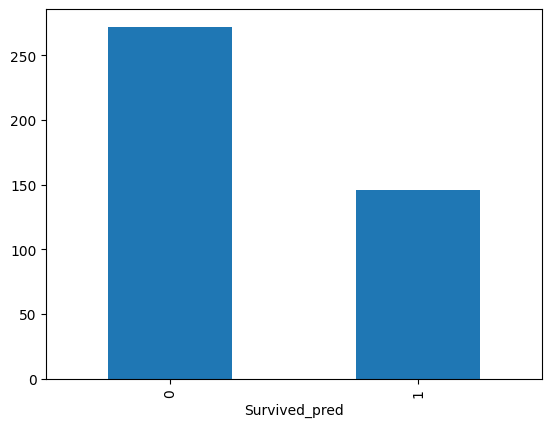

In [74]:
df_final['Survived_pred'].value_counts().plot(kind='bar')